# Full pipeline example

This demo will show how to load calints data downloaded from MAST and fit for the eclipse depths of each visits individually and jointly using Erebus.

In [1]:
from erebus import Erebus

Erebus needs two configuration files to run: One that includes the physical parameters of the planet, and one that includes the configuration of the run.

An example planet file can look like this (detailed explanation is given on the [planet configuration page](/api_config/#utility.planet.Planet)):

planet.yaml
```
name: LHS1478b
t0: [2458786.75425, 0.00042]
p: [1.9495378, 0.0000041]
rp_rstar: [0.0462, 0.0011]
a_rstar: [16.119, 0.094]
inc: [87.452, 0.052]
ecc: [0]
w: [0]
```

An example run configuration can look like this (detailed information is given on the [run configuration page](/api_config/#utility.run_cfg.ErebusRunConfig)):

run_config.yaml
```
fit_fnpca: true
fit_linear: true
perform_individual_fits: true
perform_joint_fit: true
calints_path: ./mast_lhs1478b
planet_path: ./lhs1478b.yaml
aperture_radius: 5
annulus_start: 12
annulus_end: 20
trim_integrations: [10, 40]
```

To follow along with this demo you can either a) download JWST exoplanet observations from the [Barbara A. Mikulski Archive for Space Telescopes](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html) or b) clone the Erebus GitHub repo and find example data provided at `manual_tests/lhs1478b`. The `manual_tests` directory also has an example planet configuration file and run configuration file.

In [2]:
run = "../../manual_tests/lhs1478b_run.yaml"
erebus = Erebus(run)

Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0879+/-0.0004 days from the start of the observation
Visit jw03730012001 already ran
Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0886+/-0.0004 days from the start of the observation
Visit jw03730013001 already ran
Circular orbit: using gaussian prior for t_sec_offset
Joint fit already ran


Creating an `Erebus` pipeline object loads in all the data and caches it to the disk. Once it is loaded, we can run it. We can optionally set the output folder where Erebus will save information on the run parameters, output files for the individual and joint fits, as well as figures for visualizing the data.

Both the `Erebus` constructor and `run` method can take in an optional `force_clear_cache` parameter to clear the cache if need be, else the `erebus_cache` folder can be deleted manually. 

In [3]:
erebus.run(output_folder="./output/")

Skipping jw03730012001: already ran
Cannot make corner plot: fitting was not yet run!
Cannot make chain plot: fitting was not yet run!
Skipping jw03730013001: already ran
Cannot make corner plot: fitting was not yet run!
Cannot make chain plot: fitting was not yet run!
Skipping joint fit: already ran
Offset:  0.0 hours
Cannot make corner plot: fitting was not yet run!
Cannot make chain plot: fitting was not yet run!


After running the Erebus pipeline the results are saved to the provided outputs folder. Erebus has built-in plotting routines or you can directly access the data and make your own plots.

Offset:  0.0 hours


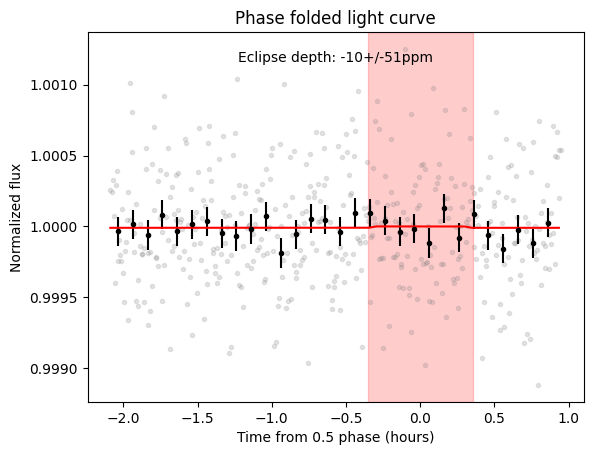

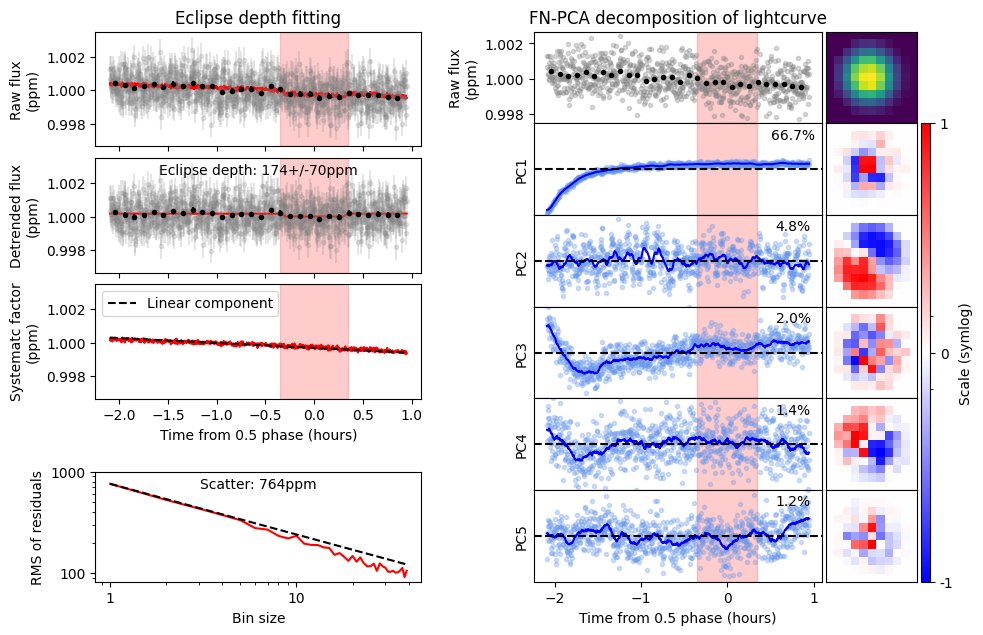

In [5]:
from erebus.joint_fit_results import JointFitResults
from erebus.individual_fit_results import IndividualFitResults

from erebus.plotting import plot_joint_fit
from erebus.plotting import plot_fnpca_individual_fit

joint_fit = JointFitResults.load("./output/lhs1478b_joint_fit.h5")
plot_joint_fit(joint_fit, show = True)

visit_1 = IndividualFitResults.load("./output/lhs1478b_visit_1_jw03730013001.h5")
plot_fnpca_individual_fit(visit_1, show = True)

Consult the [API](/api_results) for a list of data available in each results object.